## Time series

In [1]:
%matplotlib inline

In [2]:

import numpy as np # importing numpy
import pandas as pd # importing pandas library
import matplotlib.pyplot as plt  # importing matplotlib library
import seaborn as sns # importing seaborn library
import scipy.stats as ss

# Better sized plots.
plt.rcParams["figure.figsize"] = (10, 6)
# Nicer colours and styles for plots.
# plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

In [3]:
# Dublin Airport Hourly Data
# https://data.gov.ie/dataset/dublin-airport-hourly-data
url = "https://cli.fusio.net/cli/climate_data/webdata/hly532.csv"

In [4]:
df = pd.read_csv(url, skiprows = 23, low_memory=False, nrows = 1000)

In [5]:
df["date"]

0      01-jan-1990 00:00
1      01-jan-1990 01:00
2      01-jan-1990 02:00
3      01-jan-1990 03:00
4      01-jan-1990 04:00
             ...        
995    11-feb-1990 11:00
996    11-feb-1990 12:00
997    11-feb-1990 13:00
998    11-feb-1990 14:00
999    11-feb-1990 15:00
Name: date, Length: 1000, dtype: object

In [6]:
df["datetime"] = pd.to_datetime(df["date"])

In [7]:
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,datetime
0,01-jan-1990 00:00,2,0.1,0,9.0,0,8.1,7.1,10.1,88,...,10,2,140,50,52,0.0,7000,7,8,1990-01-01 00:00:00
1,01-jan-1990 01:00,2,0.0,0,8.9,0,8.0,7.0,10.0,88,...,12,2,140,50,52,0.0,7000,7,8,1990-01-01 01:00:00
2,01-jan-1990 02:00,2,0.0,0,8.8,0,7.9,6.9,9.9,88,...,14,2,150,20,52,0.0,5000,7,8,1990-01-01 02:00:00
3,01-jan-1990 03:00,2,0.0,0,9.0,0,8.1,7.1,10.1,88,...,17,2,160,50,52,0.0,6000,7,8,1990-01-01 03:00:00
4,01-jan-1990 04:00,0,0.6,0,9.0,0,8.4,7.8,10.5,92,...,15,2,160,60,65,0.0,9000,5,8,1990-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11-feb-1990 11:00,0,0.1,0,7.5,0,5.8,3.5,7.9,76,...,22,2,190,60,62,0.0,30000,45,8,1990-02-11 11:00:00
996,11-feb-1990 12:00,2,0.0,0,8.0,0,6.5,4.6,8.5,79,...,24,2,190,60,62,0.1,20000,100,7,1990-02-11 12:00:00
997,11-feb-1990 13:00,0,0.6,0,7.5,0,6.1,4.3,8.3,80,...,22,2,190,60,62,0.0,12000,20,8,1990-02-11 13:00:00
998,11-feb-1990 14:00,2,0.0,0,7.5,0,5.5,2.7,7.4,72,...,20,2,220,21,62,0.1,27000,40,7,1990-02-11 14:00:00


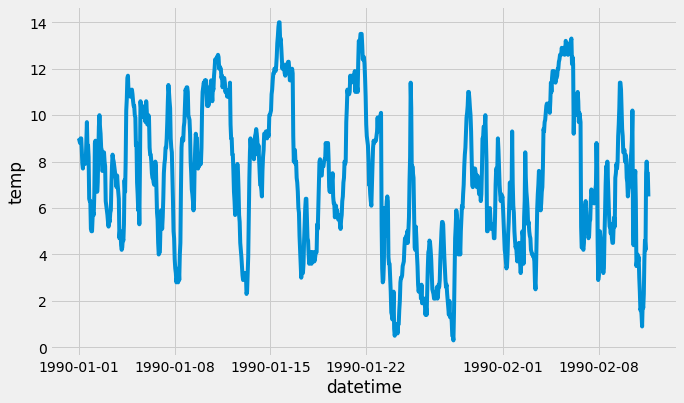

In [8]:
sns.lineplot(x = "datetime", y= "temp", data = df[:])

---

In [9]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


---


### Simulation

In [10]:
# adapted from pandas.pydata timeseries
# 72 hours starting with midnight Jan 1st, 2020
rng = pd.date_range("1/1/2020", periods = 72, freq = "H")
rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00', '2020-01-02 01:00:00',
               '2020-01-02 02:00:00', '2020-01-02 03:00:00',
               '2020-01-02 04:00:00', '2020-01-02 05:00:00',
               '2020-01-02 06:00:00', '2020-01-02 07:00:00',
               '2020-01-

In [11]:
# ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts = pd.DataFrame(np.random.default_rng().poisson(10, len(rng)), index = rng, columns = ["admissions"] )
# np.random.poisson(5, 10) # oldway numpy
# np.random.default_rng().poisson()  # newway numpy

In [12]:
ts

,admissions
2020-01-01 00:00:00,12
2020-01-01 01:00:00,10
2020-01-01 02:00:00,8
2020-01-01 03:00:00,4
2020-01-01 04:00:00,10
...,...
2020-01-03 19:00:00,16
2020-01-03 20:00:00,5
2020-01-03 21:00:00,6
2020-01-03 22:00:00,6


### Accessing and grouping

In [13]:
ts.describe()

,admissions
count,72.000000
mean,10.069444
std,3.087122
min,3.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,16.000000


In [14]:
ts.loc["2020-01-01 03:00:00": "2020-01-02- 23:00:00"]#.mean()

,admissions
2020-01-01 03:00:00,4
2020-01-01 04:00:00,10
2020-01-01 05:00:00,13
2020-01-01 06:00:00,14
2020-01-01 07:00:00,14
2020-01-01 08:00:00,7
2020-01-01 09:00:00,11
2020-01-01 10:00:00,12
2020-01-01 11:00:00,8
2020-01-01 12:00:00,10


In [15]:
ts.resample("D").mean()


,admissions
2020-01-01,9.958333
2020-01-02,9.625000
2020-01-03,10.625000


 ---
## Bias

### Location and scale

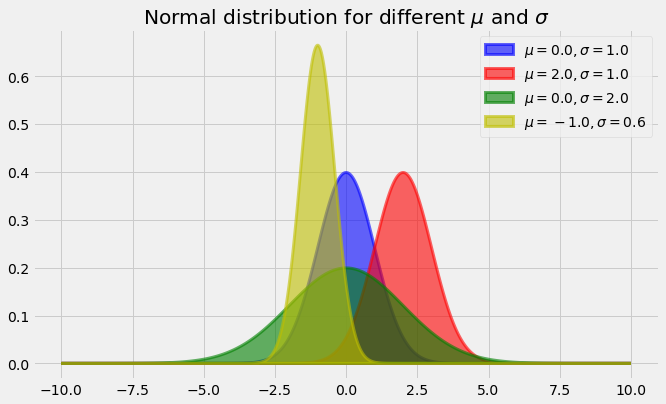

In [16]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=1.0), label="$\mu = 0.0, \sigma = 1.0$", c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 2.0, scale=1.0), label="$\mu = 2.0, \sigma = 1.0$", c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=2.0), label="$\mu = 0.0, \sigma = 2.0$", c='g', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=-1.0, scale=0.6), label="$\mu =-1.0, \sigma = 0.6$", c='y', alpha=0.6, lw=3.0)

plt.title("Normal distribution for different $\mu$ and $\sigma$")
plt.legend();

---
### Probability 


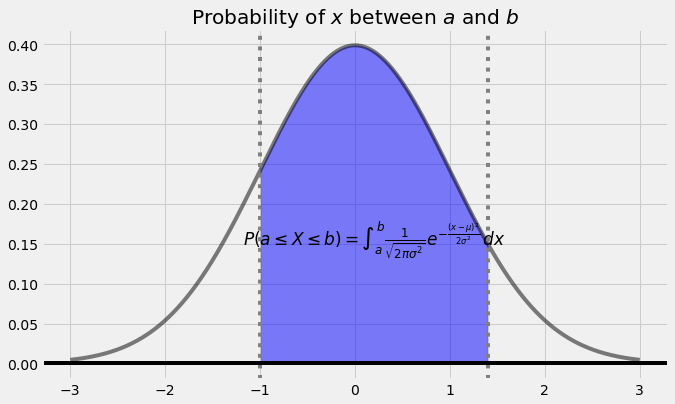

In [17]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc= 0.0, scale=1.0)

xseg = x[np.logical_and(-1.0 < x,  x < 1.4)]
yseg = y[np.logical_and(-1.0 < x,  x < 1.4)]

plt.plot(x, y, color='k', alpha=0.5)
plt.fill_between(xseg, yseg, color='b', alpha=0.5)
plt.axvline(x=-1.0, color='grey', linestyle=':')
plt.axvline(x= 1.4, color='grey', linestyle=':')

plt.text(0.2, 0.15,
         r'$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$',
         horizontalalignment='center', size=17)

plt.axhline(y= 0.0, color='black', linestyle='-')

plt.title("Probability of $x$ between $a$ and $b$");

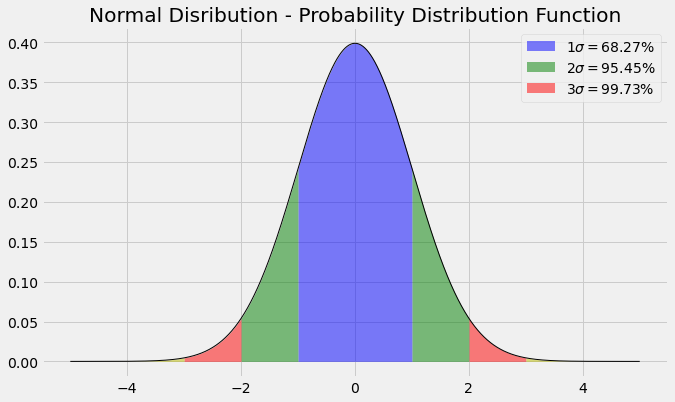

In [18]:
x = np.linspace(-5.0, 5.0, 10000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

xseg = x[np.logical_and(-5.0 <= x, x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-3.0 <= x, x <= -2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-2.0 <= x, x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0)
xseg = x[np.logical_and(-1.0 <= x, x <=  1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='b', alpha=0.5, linewidth=0, label="$1 \sigma = 68.27\%$")
xseg = x[np.logical_and( 1.0 <= x, x <=  2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0, label="$2 \sigma = 95.45\%$")
xseg = x[np.logical_and( 2.0 <= x, x <=  3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0, label="$3 \sigma = 99.73\%$")
xseg = x[np.logical_and( 3.0 <= x, x <=  5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)

plt.title("Normal Disribution - Probability Distribution Function")
plt.legend();

---
### Sampling distribution

In [19]:
np.set_printoptions(formatter={'float': lambda x: "{0:6.3f}".format(x)})

sampsize = 10
nosamps = 1000

samp = np.random.standard_normal((nosamps, sampsize))

print(samp)

[[ 1.118  0.325 -0.327 ... -1.602  1.543  0.343]
 [ 0.272 -0.773  1.486 ...  0.438 -0.835 -0.756]
 [ 0.869  0.110 -1.079 ...  1.027  0.674 -1.434]
 ...
 [-0.011 -0.978 -1.846 ... -0.264 -1.366 -1.039]
 [-0.552  0.224 -0.074 ... -1.225 -0.700  0.308]
 [-1.011  0.544 -0.103 ... -1.912  1.108 -0.307]]


In [20]:
mean = samp.sum(axis=1) / sampsize
print(mean)

[ 0.205  0.494 -0.156  0.259  0.698 -0.140 -0.125 -0.062  0.011  0.314
  0.580  0.523  0.388 -0.120  0.028  0.221  0.152  0.723 -0.387 -0.052
  0.132  0.365 -0.264 -0.073 -0.209  0.087 -0.441  0.553  0.363  0.160
 -0.572 -0.399 -0.079 -0.642  0.174 -0.614  0.372 -0.409  0.275 -0.476
 -0.005 -0.492 -0.464 -0.083  0.318 -0.216 -0.467  0.016  0.014  0.104
 -0.116 -0.424 -0.066 -0.088 -0.510 -0.452  0.021  0.430 -0.140 -0.147
 -0.707  0.147  0.589  0.232  0.247 -0.027  0.168  0.408 -0.183 -0.180
 -0.125 -0.202 -0.330  0.321 -0.318 -0.100 -0.308  0.369 -0.164 -0.484
 -0.180  0.268 -0.285 -0.035 -0.207 -0.495  0.082  0.257  0.076 -0.138
  0.637 -0.028 -0.271  0.101 -0.307 -0.222 -0.405  0.027 -0.025 -0.324
 -0.121 -0.221 -0.376 -0.094 -0.263 -0.009  0.242 -0.099 -0.141  0.076
  0.097 -0.089  0.140 -0.467  0.211 -0.316 -0.094  0.029 -0.161  0.601
 -0.283  0.756  0.200  0.045  0.009  0.363 -0.161 -0.191 -0.322  0.548
  0.272 -0.175  0.331  0.331  0.028  0.234 -0.078  0.063 -0.010 -0.575
  0.12

In [21]:
# Calculate the variance.
vari = (samp - mean[:, np.newaxis])**2
vari = vari.sum(axis=1) / (sampsize)
# stddev = np.sqrt(vari)

# Without the correction.
mean_vari = vari.sum() / nosamps
print(mean_vari)

# Using Bessel's correction: https://en.wikipedia.org/wiki/Bessel%27s_correction
print(mean_vari * (sampsize / (sampsize - 1.0)))

0.8963435696564324
0.9959372996182583


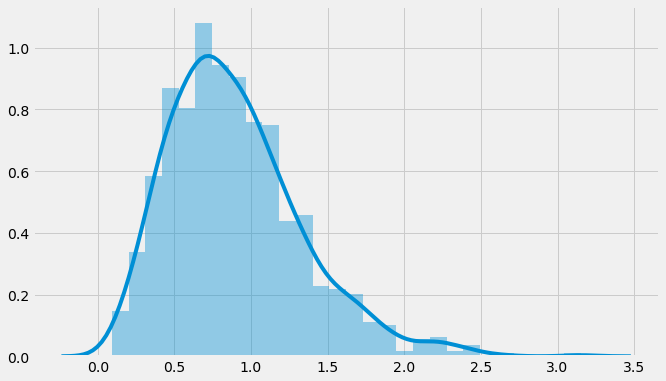

In [22]:
sns.distplot(vari)

<br>

---

## SQLite in Python

In [23]:
import sqlite3

In [24]:
conn = sqlite3.connect("data/example.db")

In [25]:
c = conn.cursor()

In [27]:
# c.execute("CREATE TABLE person(id INTEGER PRIMARY KEY, name text, address text)")
# conn.commit()

In [28]:
c.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
c.fetchall()

[('person',)]

In [30]:
c.execute("INSERT INTO person VALUES('Anna Henry', 'Carlow')")
conn.commit()

In [31]:
c.execute("SELECT * FROM person")
c.fetchall()

[('Anna Henry', 'Carlow')]

In [32]:
person = [('Shelby Beck','Tipperary'), ('Marie Carr', 'Kerry'), ('Sarah Heath', 'Monaghan')]

In [33]:
person

[('Shelby Beck', 'Tipperary'),
 ('Marie Carr', 'Kerry'),
 ('Sarah Heath', 'Monaghan')]

In [35]:
c.executemany("INSERT INTO person VALUES(?, ?)", person)
conn.commit()

In [36]:
c.execute("SELECT * FROM person")
c.fetchall()

[('Anna Henry', 'Carlow'),
 ('Shelby Beck', 'Tipperary'),
 ('Marie Carr', 'Kerry'),
 ('Sarah Heath', 'Monaghan')]

In [37]:
c.execute("INSERT INTO person VALUES('Anna Henry', 'Carlow')")
conn.commit()

In [40]:
c.execute("SELECT ROWID, name, address FROM person")
c.fetchall()

[(1, 'Anna Henry', 'Carlow'),
 (2, 'Shelby Beck', 'Tipperary'),
 (3, 'Marie Carr', 'Kerry'),
 (4, 'Sarah Heath', 'Monaghan'),
 (5, 'Anna Henry', 'Carlow'),
 (6, 'Anna Henry', 'Carlow')]

In [43]:
c.execute("DELETE FROM person where rowid=1")
conn.commit()

In [45]:
c.execute("DELETE FROM person where rowid=6")
conn.commit()

In [46]:
c.execute("SELECT ROWID, name, address FROM person")
c.fetchall()

[(2, 'Shelby Beck', 'Tipperary'),
 (3, 'Marie Carr', 'Kerry'),
 (4, 'Sarah Heath', 'Monaghan'),
 (5, 'Anna Henry', 'Carlow')]

In [47]:
c.execute("INSERT INTO person VALUES('Robert Snyder', 'Leitrim')")
conn.commit()

In [48]:
c.execute("SELECT ROWID, name, address FROM person")
c.fetchall()

[(2, 'Shelby Beck', 'Tipperary'),
 (3, 'Marie Carr', 'Kerry'),
 (4, 'Sarah Heath', 'Monaghan'),
 (5, 'Anna Henry', 'Carlow'),
 (6, 'Robert Snyder', 'Leitrim')]

In [49]:
c.execute("SELECT name FROM SQLITE_MASTER WHERE type = 'table'")
c.fetchall()

[('person',)]

In [50]:
c.execute(""" 
    SELECT p.Name, c.Registration
    FROM person as p JOIN car as c ON p.ID = c.OwnerId    
""")
c.fetchall()

OperationalError: no such table: car

In [52]:
conn.close()

***

### End